In [51]:
import pandas as pd
import numpy as np
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib notebook

### We have performed some data cleaning and exploratory data analysis (EDA) in our file NHL 2017-2018 Salary Data Cleaning & EDA. Again, we thank Hockey Abstract for the data we got, which can be found in Excel files at http://www.hockeyabstract.com/testimonials/nhl2017-18.

### In this notebook we now aim to build a linear regression model that will predict a player's salary given their different game statistics. We encourage people to review the rich feature set given in the Excel file, as well as the dataframes created in our EDA process. We could not include all of the features included from the source file, as the scope is to large for the purpose of this project.

### Our first step will be to build a basic regression model off our first look data, which is a condensed version of all the features. It includes things such as goals, assists, play time, penalties, and career stats. We aim to reach a modest accuracy using this data which will guide us in further analysis. We may need to check that our data cleaning steps of filling missing values made it into the CSV file of condensed data.

### We will then move onto making use of all numerical columns, using a basic wrapping method for balancing accuracy and feature selection.

### Our final step will be to explore text based preprocessing to turn our text columns into numerical data that may be used in the regression model. We may then test if this adds any useful insight or accuracy into our salary predictions.

In [2]:
df = pd.read_csv('nhl_2017_18_condensed.csv')

In [3]:
df.head()

,PlInf_Name,ContInf_Salary,PlInf_Nat,PlInf_Ht,PlInf_Wt,PlInf_DftRd,PlInf_Ovrl,PlInf_Age,PlInf_Seasons,PlInf_Team,...,PrimStat_TOI,IndStat_iSF,PenStat_iPenT,PenStat_iPenD,CarStat_GP,CarStat_G,CarStat_A,CarStat_+/-,CarStat_PIM,CarStat_TOI
0,Jimmy Hayes,700000,USA,77,215,2.0,60.0,28,7,NJD,...,23617,37,3,2,334,54,55,-29,149,4120
1,Jori Lehtera,4700000,FIN,74,212,3.0,65.0,30,4,PHI,...,39114,45,7,9,280,33,75,19,134,4109
2,Michael Stone,3500000,CAN,75,210,3.0,69.0,27,7,CGY,...,82396,98,14,10,425,29,83,-46,238,8141
3,Scott Hartnell,1000000,CAN,74,215,1.0,6.0,35,17,NSH,...,44707,82,19,8,1249,327,380,66,1809,19535
4,Ron Hainsey,3600000,USA,75,205,1.0,13.0,36,15,TOR,...,104951,73,10,2,987,53,223,-61,410,20909


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 26 columns):
PlInf_Name         890 non-null object
ContInf_Salary     890 non-null int64
PlInf_Nat          890 non-null object
PlInf_Ht           890 non-null int64
PlInf_Wt           890 non-null int64
PlInf_DftRd        762 non-null float64
PlInf_Ovrl         762 non-null float64
PlInf_Age          890 non-null int64
PlInf_Seasons      890 non-null int64
PlInf_Team         890 non-null object
PrimStat_GP        890 non-null int64
PrimStat_G         890 non-null int64
PrimStat_A         890 non-null int64
PrimStat_+/-       890 non-null int64
PrimStat_PIM       890 non-null int64
PrimStat_Shifts    890 non-null int64
PrimStat_TOI       890 non-null int64
IndStat_iSF        890 non-null int64
PenStat_iPenT      890 non-null int64
PenStat_iPenD      890 non-null int64
CarStat_GP         890 non-null int64
CarStat_G          890 non-null int64
CarStat_A          890 non-null int64
CarStat_+/-   

### When we preprocessed and cleaned our data we did not perform those steps on the first_look_df copy we made at the beginning of our analysis. We saved this un-clean data as a CSV, so if we use it for a model in SciKit Learn we must handling the missing values first, as SciKit Learn will not perform properly without that. This will require us filling in values related to the Draft in our dataframe.

In [5]:
#We will fill in the missing draft information by replacing null values with -1
df[['PlInf_DftRd','PlInf_Ovrl']] = df[['PlInf_DftRd','PlInf_Ovrl']].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 26 columns):
PlInf_Name         890 non-null object
ContInf_Salary     890 non-null int64
PlInf_Nat          890 non-null object
PlInf_Ht           890 non-null int64
PlInf_Wt           890 non-null int64
PlInf_DftRd        890 non-null float64
PlInf_Ovrl         890 non-null float64
PlInf_Age          890 non-null int64
PlInf_Seasons      890 non-null int64
PlInf_Team         890 non-null object
PrimStat_GP        890 non-null int64
PrimStat_G         890 non-null int64
PrimStat_A         890 non-null int64
PrimStat_+/-       890 non-null int64
PrimStat_PIM       890 non-null int64
PrimStat_Shifts    890 non-null int64
PrimStat_TOI       890 non-null int64
IndStat_iSF        890 non-null int64
PenStat_iPenT      890 non-null int64
PenStat_iPenD      890 non-null int64
CarStat_GP         890 non-null int64
CarStat_G          890 non-null int64
CarStat_A          890 non-null int64
CarStat_+/-   

In [6]:
#Get the numeric columns from df
numeric_cols = list(df.select_dtypes(exclude=['object','datetime64']).columns)
df_numeric = df[numeric_cols].copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 23 columns):
ContInf_Salary     890 non-null int64
PlInf_Ht           890 non-null int64
PlInf_Wt           890 non-null int64
PlInf_DftRd        890 non-null float64
PlInf_Ovrl         890 non-null float64
PlInf_Age          890 non-null int64
PlInf_Seasons      890 non-null int64
PrimStat_GP        890 non-null int64
PrimStat_G         890 non-null int64
PrimStat_A         890 non-null int64
PrimStat_+/-       890 non-null int64
PrimStat_PIM       890 non-null int64
PrimStat_Shifts    890 non-null int64
PrimStat_TOI       890 non-null int64
IndStat_iSF        890 non-null int64
PenStat_iPenT      890 non-null int64
PenStat_iPenD      890 non-null int64
CarStat_GP         890 non-null int64
CarStat_G          890 non-null int64
CarStat_A          890 non-null int64
CarStat_+/-        890 non-null int64
CarStat_PIM        890 non-null int64
CarStat_TOI        890 non-null int64
dtypes: float64(2

### It is always a good step to begin with a basic model, so that interpretation is not made difficult by overwhelming amounts of features and data. This will also help in choosing the best model and parameters within that model before spending long amounts of resources going in the wrong direction. 

### We have performed all of our EDA in another notebook, so here we move onto building a basic Linear Regression using the first_look_df data. We will split our data into train and test splits, keeping 30% in the test subset. We will not adjust any parameters at first, and simply read the R^2 value (R^2 is commonly known as the coefficient of determination). The R^2 helps us understand the variance in our Salary values that is predictable from our features (i.e. Goals, Assists, Time Played, etc.).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
#We now wish to train test split
X = df_numeric.drop('ContInf_Salary',axis=1)
y = df_numeric.ContInf_Salary

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

### The model is quite quick and easy to train since we are using a small subset and we only have 890 players. We can compare how the model performs by printing out the R^2 values for the train and test set respectively.

In [10]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.71


In [11]:
y_pred = lr.predict(X_test)

In [12]:
results = pd.DataFrame({'Name':df.PlInf_Name.iloc[y_test.index], 'Actual': y_test,'Predicted':y_pred})
results

,Name,Actual,Predicted
280,Jesper Bratt,732500,1.753033e+06
434,Nate Prosser,650000,7.557510e+05
39,Patrick Eaves,3300000,2.633621e+06
417,Jordan Staal,6000000,6.212372e+06
585,Joshua Ho-Sang,832500,9.239436e+05
...,...,...,...
453,Kris Russell,5000000,3.731355e+06
697,Jake Muzzin,4100000,4.578502e+06
693,Ryan McDonagh,5100000,5.079873e+06
741,Tomas Hyka,710000,2.988186e+05


In [13]:
coeff = pd.DataFrame(lr.coef_,X.columns).reset_index()
coeff.columns = ['Feature_Name','Intercept']
coeff

,Feature_Name,Intercept
0,PlInf_Ht,-36528.654950
1,PlInf_Wt,12172.716254
2,PlInf_DftRd,-39270.145683
3,PlInf_Ovrl,1117.418154
4,PlInf_Age,943.599861
5,PlInf_Seasons,-14948.396243
6,PrimStat_GP,-46210.410253
7,PrimStat_G,34434.860251
8,PrimStat_A,57574.914929
9,PrimStat_+/-,-18382.456786


### We can compare the predicted outputs of our test set in tabular form in the above dataframe, but it makes more sense to get a visual understanding, so we plot a comparison of the actual salary next to the predicted salary for the first 20 players in our test split.

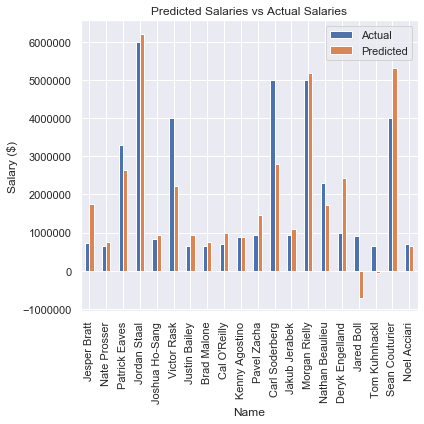

In [14]:
results.head(20).plot(kind='bar',figsize=(6,6),x='Name')
plt.xticks(rotation=90)
plt.title('Predicted Salaries vs Actual Salaries')
plt.ylabel('Salary ($)')
plt.tight_layout()
plt.show()

In [15]:
results[results.Predicted <=0]

,Name,Actual,Predicted
544,Jared Boll,900000,-720147.886136
531,Tom Kuhnhackl,660000,-72992.214188


### For a first pass a training R^2 of .68 and test R^2 of .71 seems like a positive result. It is good we are not over fitting data, which would be seen if our test score was much lower. We may be underfitting and/or not using our features in the best way here, as a training score of .71 isn't very high but still reasonable with the small amount of samples we have access too.

### The most alarming result is not seen in the R^2 scores, but in viewing our predictions compared to actual in the test set salaries. We predicted two negative salaries, which is completely unphysical.

### Even with our model performing well immediately out of the gate, we strive to make a stronger model for our predictions. While still using our first_look_df data we will explore Lasso and Ridge Regression methods to try and improve our model. These methods both perform similar to standard Linear Regression, but with a twist on the classic regularization by forcing minimization on the coefficient terms found when fitting to the data. In depth explanations of these methods are not the scope of this project, but suffice to say in some cases by aiming to keep coefficient terms of the model small we can avoid problems of over or under fitting.

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.71


In [17]:
ridge10 = Ridge(alpha=1000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.63
Test set score: 0.70


In [18]:
ridge01 = Ridge(alpha=.000001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.71


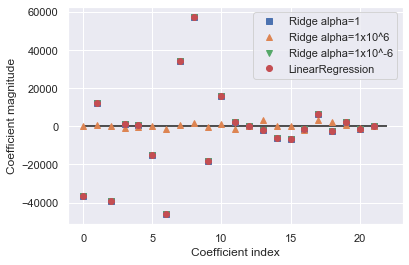

In [19]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=1x10^6")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=1x10^-6")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
# plt.ylim(-25, 25)
plt.legend()
plt.show()

### The use of Ridge allows for more control of regression coefficients through tuning the alpha parameter. Like linear regression it is scored using R^2, but uses a different loss function. The loss function for Ridge is known as L2 regularization, which uses alpha to tune the linear coefficients. The goal is to keep the the coefficients as small as possible, increasing speed to train and fit models. This allows for the model to avoid over or under fitting, improving test results on unseen data.

### Typically one chooses an alpha parameter of 1 to begin, and adjusts from there. Above we have tested in a range from 10E6 to 10E-6, where our model's R^2 only suffers for the maximum alpha. Even then, our R^2 score remains relatively close to linear regression and Ridge with alpha at 1.

### With this information it may be best to better our model through direct feature selection, instead of different regression normalizations. This could only be the case for our subset of data, but we will prepare a wrapping method on first_look_df data, then apply the same technique to all numerical data.

In [20]:
#Test wrapping to find the single best feature
test_score = []
train_score = []
feature_name = []

test_feats = list(X.columns)
for item in test_feats:
    X_train, X_test, y_train, y_test = train_test_split(X[item].values.reshape(-1, 1), y,test_size=0.3, random_state=42)
    lr = LinearRegression().fit(X_train, y_train)
    train_score.append(lr.score(X_train, y_train))
    test_score.append(lr.score(X_test, y_test))
    feature_name.append(item)

best_single_feat_df = pd.DataFrame({'Feature':feature_name,'Train_Score':train_score,'Test_Score':test_score})
best_single_feat_df.sort_values('Test_Score',ascending = False)
    

,Feature,Train_Score,Test_Score
18,CarStat_A,0.499060,0.579425
21,CarStat_TOI,0.501203,0.544520
17,CarStat_G,0.402883,0.455425
16,CarStat_GP,0.443322,0.437062
8,PrimStat_A,0.368900,0.416580
13,IndStat_iSF,0.327105,0.384164
12,PrimStat_TOI,0.327517,0.365384
5,PlInf_Seasons,0.344412,0.329521
11,PrimStat_Shifts,0.299230,0.315455
7,PrimStat_G,0.247315,0.245939


In [21]:
#Lets use cross validation to test our R^2 accuracy
from sklearn.model_selection import cross_val_score

test_scores = cross_val_score(lr,X,y,cv=5)
#the mean score and 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (test_scores.mean(), test_scores.std() * 2))

Accuracy: 0.64 (+/- 0.14)


In [22]:
#Repeat the best feature, but perform 10 fold cross validation to find the best score

#Create empty lists to hold values
train_score = []
test_score = []
feature_name = []

#Create list of features to test
test_feats = list(X.columns)

#Loop through features
for item in test_feats:
    #Split the data to train and test sets, use appropriate shape for single feature
    X_train, X_test, y_train, y_test = train_test_split(X[item].values.reshape(-1, 1), y,test_size=0.3, random_state=42)
    #Fit the model to the train set
    lr = LinearRegression().fit(X_train, y_train)
    #Compute cross validation score
    cv_scores = cross_val_score(LinearRegression(),X[item].values.reshape(-1, 1),y,cv=10)
    #Call mean from cross validation, and calculate test score. append lists to hold values
    train_score.append(cv_scores.mean())
    test_score.append(lr.score(X_test, y_test))
    feature_name.append(item)
    
best_single_feat_df = pd.DataFrame({'Feature':feature_name,'Train_Score':train_score,'Test_Score':test_score})
best_single_feat_df.sort_values('Train_Score',ascending = False)

,Feature,Train_Score,Test_Score
21,CarStat_TOI,0.480025,0.544520
18,CarStat_A,0.421101,0.579425
16,CarStat_GP,0.392408,0.437062
17,CarStat_G,0.338214,0.455425
5,PlInf_Seasons,0.290259,0.329521
8,PrimStat_A,0.276753,0.416580
12,PrimStat_TOI,0.261844,0.365384
13,IndStat_iSF,0.249438,0.384164
11,PrimStat_Shifts,0.224695,0.315455
20,CarStat_PIM,0.155982,0.215719


### Using 10 fold cross validation we can see that our lowest columns perform very poorly, returning sum-of-squares for the model that are larger than that of a horizontal line (the only way R^2 may be negative). This is not a major concern, as next in our wrapping method we will keep CarStat_TOI, and add a second column respectively until the score does not improve.

In [23]:
#Repeat the best feature, but perform 10 fold cross validation to find the best score

#Create empty lists to hold values
single_train_score = []
single_test_score = []
single_feature_name = []

#Create list of features to test
single_test_feats = list(X.columns)

#Loop through features
for item in test_feats:
    #Split the data to train and test sets, use appropriate shape for single feature
    X_train, X_test, y_train, y_test = train_test_split(X[item].values.reshape(-1, 1), y,test_size=0.3, random_state=42)
    #Fit the model to the train set
    lr = LinearRegression().fit(X_train, y_train)
    #Compute cross validation score
    cv_scores = cross_val_score(LinearRegression(),X[item].values.reshape(-1, 1),y,cv=10)
    #Call mean from cross validation, and calculate test score. append lists to hold values
    single_train_score.append(cv_scores.mean())
    single_test_score.append(lr.score(X_test, y_test))
    single_feature_name.append(item)
    
single_best_single_feat_df = pd.DataFrame({'Feature':single_feature_name,'Train_Score':single_train_score,
                                           'Test_Score':single_test_score})
single_best_single_feat_df.sort_values('Train_Score',ascending = False)

#Save the first best scoring feature from cross validation
first_feat = single_best_single_feat_df.sort_values('Train_Score',ascending = False).Feature.iloc[0]
use_feat = [first_feat]

other_feat = list(single_best_single_feat_df.sort_values('Train_Score',ascending = False).Feature.iloc[1:])

two_train_score = []
two_test_score = []
two_feature_name = []

for item in other_feat:
    hold_feat = use_feat + [item]
    #Split the data to train and test sets, use appropriate shape for single feature
    X_train, X_test, y_train, y_test = train_test_split(X[hold_feat], y,test_size=0.3, random_state=42)
    #Fit the model to the train set
    lr = LinearRegression().fit(X_train, y_train)
    #Compute cross validation score
    cv_scores = cross_val_score(LinearRegression(),X[hold_feat],y,cv=10)
    #Call mean from cross validation, and calculate test score. append lists to hold values
    two_train_score.append(cv_scores.mean())
    two_test_score.append(lr.score(X_test, y_test))
    two_feature_name.append(item)
    
two_best_single_feat_df = pd.DataFrame({'Feature':two_feature_name,'Train_Score':two_train_score,
                                           'Test_Score':two_test_score})
two_best_single_feat_df.sort_values('Train_Score',ascending = False)

,Feature,Train_Score,Test_Score
4,PrimStat_A,0.585074,0.652853
6,IndStat_iSF,0.571313,0.641453
9,PrimStat_G,0.562809,0.617573
5,PrimStat_TOI,0.541835,0.602404
7,PrimStat_Shifts,0.528754,0.584930
13,PenStat_iPenD,0.524091,0.584452
11,PlInf_Age,0.514321,0.617030
3,PlInf_Seasons,0.513636,0.599435
10,PrimStat_GP,0.502674,0.556127
1,CarStat_GP,0.498606,0.576573


### Below we share our first pass at creating our own wrapping algorithm.

In [24]:
#Repeat the best feature, but perform 10 fold cross validation to find the best score

#Create empty lists to hold values
single_train_score = []
single_test_score = []
single_feature_name = []

#Create list of features to test
single_test_feats = list(X.columns)

#Loop through features
for item in test_feats:
    #Split the data to train and test sets, use appropriate shape for single feature
    X_train, X_test, y_train, y_test = train_test_split(X[item].values.reshape(-1, 1), y,test_size=0.3, random_state=42)
    #Fit the model to the train set
    lr = LinearRegression().fit(X_train, y_train)
    #Compute cross validation score
    cv_scores = cross_val_score(LinearRegression(),X[item].values.reshape(-1, 1),y,cv=10)
    #Call mean from cross validation, and calculate test score. append lists to hold values
    single_train_score.append(cv_scores.mean())
    single_test_score.append(lr.score(X_test, y_test))
    single_feature_name.append(item)
    
single_best_single_feat_df = pd.DataFrame({'Feature':single_feature_name,'Train_Score':single_train_score,
                                           'Test_Score':single_test_score})
single_best_single_feat_df.sort_values('Train_Score',ascending = False)

#Save the first best scoring feature from cross validation
first_feat = single_best_single_feat_df.sort_values('Train_Score',ascending = False).Feature.iloc[0]
use_feat = [first_feat]

other_feat = list(single_best_single_feat_df.sort_values('Train_Score',ascending = False).Feature.iloc[1:])

hold_train_score = []
hold_test_score = []
feature_name = []
flag = 1
best_score = single_best_single_feat_df.sort_values('Train_Score',ascending = False).Train_Score.iloc[0]

while flag > 0:
    for item in other_feat:
        hold_feat = use_feat + [item]
        #Split the data to train and test sets, use appropriate shape for single feature
        X_train, X_test, y_train, y_test = train_test_split(X[hold_feat], y,test_size=0.3, random_state=42)
        #Fit the model to the train set
        lr = LinearRegression().fit(X_train, y_train)
        #Compute cross validation score
        cv_scores = cross_val_score(LinearRegression(),X[hold_feat],y,cv=10)
        #Call mean from cross validation, and calculate test score. append lists to hold values
        hold_train_score.append(cv_scores.mean())
        hold_test_score.append(lr.score(X_test, y_test))
        feature_name.append(item)

    hold_best_feat_df = pd.DataFrame({'Feature':feature_name,'Train_Score':hold_train_score,
                                               'Test_Score':hold_test_score})
    hold_best_feat_df.sort_values('Train_Score',ascending = False)

    if hold_best_feat_df.sort_values('Train_Score',ascending = False).Train_Score.iloc[0] > best_score:
        use_feat+= [hold_best_feat_df.sort_values('Train_Score',ascending = False).Feature.iloc[0]]
        best_score = hold_best_feat_df.sort_values('Train_Score',ascending = False).Train_Score.iloc[0]
        other_feat.remove(hold_best_feat_df.sort_values('Train_Score',ascending = False).Feature.iloc[0])
    else:
        flag = -20

#Assign value to make sure we get the same result after cleaning up our method
comp_1 = use_feat
    

### This method is quite messy, and could use some improvement. We would also like to form it into a function so it may be used in later analysis with all numerical columns.

In [25]:
def forward_linreg_wrap(X,y,k=5):
    ### This function takes feature data and target variables both in the form of dataframes, and performs
    ### k fold validation. It will return a list of the features to use to achieve a maximum R^2 score.
    ### I got inspiration and thank https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
    init_feat = list(X.columns)
    test_feat = list(X.columns)
    best_feat = []
    max_score = 0
    
    #We wish to loop as long as we have not exhausted features to test
    while len(test_feat)>0:
        #update test features by removing the previously found best feature
        test_feat = list(set(init_feat)-set(best_feat))
        #create panda series to track scores
        new_score = pd.Series(index=test_feat)
        #test each remaining test feature paired with the previously best found features
        for new_feat in test_feat:
            new_X = X[[new_feat]+best_feat]
            #This if statement is necessary for the independent variables to have the correct shape in SciKit Learn Model
            #We then perform K fold validation on our feature set to find the R^2 score
            if len(new_X) == 1:
                cv_scores = cross_val_score(LinearRegression(),new_X.values.reshape(-1, 1),y,cv=k) 
            else:
                cv_scores = cross_val_score(LinearRegression(),new_X,y,cv=k)
            new_score[new_feat] = cv_scores.mean()
        
        #Flag the max CV score
        temp_max_score = new_score.max()
        
        #Update our desired feature list by taking the maximum if adding the feature improved model R^2 score
        if temp_max_score > max_score:
            best_feat.append(new_score.idxmax())
            max_score = temp_max_score
        else:
            break
        
    return best_feat
        

In [26]:
comp_2 = forward_linreg_wrap(X,y,10)
comp_2

['CarStat_TOI',
 'PrimStat_A',
 'CarStat_GP',
 'CarStat_G',
 'PlInf_Wt',
 'IndStat_iSF',
 'PrimStat_GP',
 'PrimStat_Shifts',
 'PrimStat_PIM',
 'PlInf_Ht',
 'CarStat_PIM']

In [27]:
comp_2 == comp_1

True

### With the best features found for R^2 scoring in the Scikit Learn Linear Regression model we fit a model on a new random state and check our score on the test data.

In [28]:
#Find best feature list
feat_list = forward_linreg_wrap(X,y,10)

#Train test split using these features
X_train, X_test, y_train, y_test = train_test_split(X[feat_list], y,test_size=0.3, random_state=42)
#Fit using regression model
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#Predict on test set
y_pred = lr.predict(X_test)

#Save results to compare predictions
results = pd.DataFrame({'Name':df.PlInf_Name.iloc[y_test.index], 'Actual': y_test,'Predicted':y_pred})
results

Training set score: 0.67
Test set score: 0.72


,Name,Actual,Predicted
280,Jesper Bratt,732500,1.371598e+06
434,Nate Prosser,650000,8.868214e+05
39,Patrick Eaves,3300000,2.604229e+06
417,Jordan Staal,6000000,5.877212e+06
585,Joshua Ho-Sang,832500,8.328487e+05
...,...,...,...
453,Kris Russell,5000000,3.635792e+06
697,Jake Muzzin,4100000,4.713093e+06
693,Ryan McDonagh,5100000,4.898736e+06
741,Tomas Hyka,710000,4.062912e+05


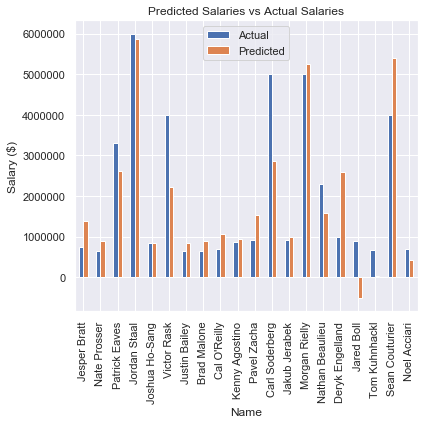

In [29]:
#Visualize our results, comparing the first 20 in the test set using a bar plot
results.head(20).plot(kind='bar',figsize=(6,6),x='Name')
plt.xticks(rotation=90)
plt.title('Predicted Salaries vs Actual Salaries')
plt.ylabel('Salary ($)')
plt.tight_layout()
plt.show()

In [30]:
results[results.Predicted <=0]

,Name,Actual,Predicted
544,Jared Boll,900000,-518147.200141


### We can see our feature selection work has improved our test score from .71 to .72. This has improved our model where the parameter tuning in Ridge did not. There is still some concern as one player, Jared Boll, still has a negative predicted salary. This is why it is important to carefully check all results. For now we will chalk this up as an outlier due to the size of our sample set. It may be corrected as we take into account all of the numeric data, but would have to be further analyzed if this was all that was available.

### We will import our complete and clean numerical data, and explore what results regression gives us taking advantage of more features. We will need to add the name column to this data frame, even though it will not be used in model creation. The names are beneficial when creating graphs.

In [31]:
df_1 = pd.read_csv('nhl_2017_18_numeric_data.csv')
df_1.head()

,PlInf_Ht,PlInf_Wt,PlInf_DftYr,PlInf_DftRd,PlInf_Ovrl,PlInf_Debut,PlInf_Age,PlInf_Seasons,PlInf_NHLid,PrimStat_GP,...,CarStat_G.1,CarStat_A.1,CarStat_PTS.1,CarStat_+/-.1,CarStat_PIM.1,CarStat_Shot,CarStat_TOI.4,CarStat_OPS.1,CarStat_DPS.1,CarStat_PS.1
0,77,215,2008.0,2.0,60.0,2011,28,7,8474625,33,...,54,55,109,-29,149,530,4120,6.9,3.2,10.1
1,74,212,2008.0,3.0,65.0,2014,30,4,8474627,62,...,33,75,108,19,134,298,4109,4.2,5.5,9.7
2,75,210,2008.0,3.0,69.0,2011,27,7,8474628,82,...,29,83,112,-46,238,652,8141,5.5,14.8,20.4
3,74,215,2000.0,1.0,6.0,2000,35,17,8468486,62,...,327,380,707,66,1809,2777,19535,57.8,23.6,81.4
4,75,205,2000.0,1.0,13.0,2002,36,15,8468493,80,...,53,223,276,-61,410,1292,20909,10.5,41.0,51.5


In [32]:
df_1['PlInf_Name'] = df.PlInf_Name

In [33]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Columns: 185 entries, PlInf_Ht to PlInf_Name
dtypes: float64(48), int64(136), object(1)
memory usage: 1.3+ MB


In [34]:
#We now wish to train test split, we must be careful to drop the contract salary cap hit information as well
X = df_1.drop(['ContInf_Salary','PlInf_Name','ContInf_Cap_Hit'],axis=1)
y = df_1.ContInf_Salary

### With the heavy lifting done in our function above, we can perform feature selection on our new X and y data.

In [35]:
# feat_list = forward_linreg_wrap(X,y,10)
# feat_list

feat_list = ['CarStat_PS.1','OITStat_xGF','Other_CHIP','OITStat_HDCF','Other_MGL','PrimStat_PAX','PrimStat_GP',
 'CarStat_TOI.4','PrimStat_PTS','Other_Grit','PlInf_NHLid','Other_SOGDG','FaceStat_ozFOW','FaceStat_ozFOL',
 'CatAll_OWAR','PlInf_Wt','PlInf_Age','PlInf_DftYr','IndStat_NZS','IndStat_iBLK','IndGoalStat_G.Tip','CatAll_DPS',
 'CatAll_DWAR','FaceStat_nzFOW','PenStat_Maj','CarStat_PIM.1','PenStat_Min','IndStat_ZS%','FaceStat_FOW.Down',
 'IndStat_iDS','CarStat_A.1','CatAll_WAR','IndGoalStat_S.Snap','PenStat_iPENT5','PrimStat_Gap','IndGoalStat_Wide',
 'PenStat_Game','PenStat_Match','PrimStat_TOI.2','PrimStat_Shifts','IndGoalStat_G.Bkhd']

In [36]:
#Train test split using these features
X_train, X_test, y_train, y_test = train_test_split(X[feat_list], y,test_size=0.3, random_state=42)
#Fit using regression model
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#Predict on test set
y_pred = lr.predict(X_test)

#Save results to compare predictions
results = pd.DataFrame({'Name':df.PlInf_Name.iloc[y_test.index], 'Actual': y_test,'Predicted':y_pred})
results

Training set score: 0.76
Test set score: 0.75


,Name,Actual,Predicted
280,Jesper Bratt,732500,1.532392e+06
434,Nate Prosser,650000,3.674576e+05
39,Patrick Eaves,3300000,2.317557e+06
417,Jordan Staal,6000000,7.057611e+06
585,Joshua Ho-Sang,832500,9.690389e+05
...,...,...,...
453,Kris Russell,5000000,3.057329e+06
697,Jake Muzzin,4100000,3.649818e+06
693,Ryan McDonagh,5100000,4.804136e+06
741,Tomas Hyka,710000,2.786761e+05


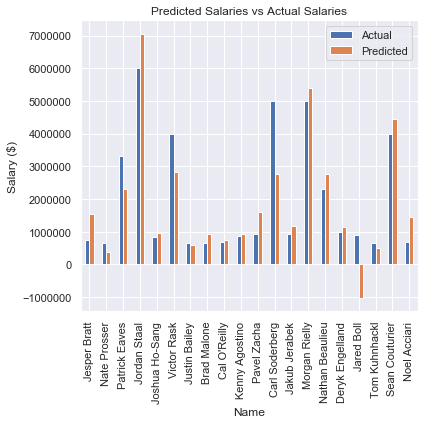

In [37]:
#Visualize our results, comparing the first 20 in the test set using a bar plot
results.head(20).plot(kind='bar',figsize=(6,6),x='Name')
plt.xticks(rotation=90)
plt.title('Predicted Salaries vs Actual Salaries')
plt.ylabel('Salary ($)')
plt.tight_layout()
plt.show()

In [38]:
sum(results.Predicted <=0)

9

### Our over all model accuracy is now up, but it is suffering even more now with negative predictions. Normally, if there were a single independent variable problem we would be able to create a scatter plot and show our fit line to see what the error was. With multi-feature regression it is not that simple, as creating a multidimensional scatter plot with a hyperplane is not ideal. We have over 200 other predictions, so maybe tossing out 9 wouldn't be bad? Under the current time constraints the best way forward seems to maybe add data that will help our model improve.

### We do so by creating dummy variables from our text columns, such as Nationality or Handedness. We also can team win loss stats for the 2017-2018 season. We will attempt some of this, and experiment if it improves our model.

In [39]:
df_text = pd.read_csv('nhl_2017_18_text_data.csv')
df_text['PlInf_Team'] = df_text['PlInf_Team'].apply(lambda x: x.split(',')[0])
df_text.head()

,PlInf_City,PlInf_Pr/St,PlInf_Cntry,PlInf_Nat,PlInf_Hand,PlInf_CorsicaID,PlInf_H-Ref_Name,PlInf_Last_Name,PlInf_First_Name,PlInf_Position,PlInf_Team,Other_Injuries,ContInf_NMC,ContInf_Status,Eqip_Stick,Eqip_Glove,Eqip_Pants,Eqip_Helmet,Eqip_Skates
0,Dorchester,MA,USA,USA,R,JIMMY.HAYES,Jimmy Hayes,Hayes,Jimmy,RW,NJD,NaN,NaN,UFA,Warrior - Covert QRL,Bauer - Vapor 1X,Bauer,Bauer - 4500,TRUE - Pro Custom
1,Helsinki,NaN,FIN,FIN,L,JORI.LEHTERA,Jori Lehtera,Lehtera,Jori,C,PHI,Illness,NaN,UFA,Warrior - Alpha QX,Warrior - Dynasty AX1,Warrior,CCM - Vector V08,Bauer - Vapor 1X
2,Winnipeg,MB,CAN,CAN,R,MICHAEL.STONE,Michael Stone,Stone,Michael,D,CGY,NaN,NTC,UFA,Warrior - Alpha QX,Bauer - Supreme 1S,Warrior,Bauer - 5100,Bauer - Supreme 1S
3,Regina,SK,CAN,CAN,L,SCOTT.HARTNELL,Scott Hartnell,Hartnell,Scott,LW,NSH,Lower body,NaN,UFA,Bauer - Vapor 1X Lite,Warrior - Dynasty AX1,Bauer,Bauer - 9900,TRUE - Pro Custom
4,Bolton,CT,USA,USA,L,RON.HAINSEY,Ron Hainsey,Hainsey,Ron,D,TOR,Illness,M-NTC,UFA,Warrior - Alpha QX,Warrior - Dynasty AX1,Warrior,Warrior - Covert PX2,Bauer - Nexus 1N


In [40]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 19 columns):
PlInf_City          890 non-null object
PlInf_Pr/St         654 non-null object
PlInf_Cntry         890 non-null object
PlInf_Nat           890 non-null object
PlInf_Hand          890 non-null object
PlInf_CorsicaID     890 non-null object
PlInf_H-Ref_Name    890 non-null object
PlInf_Last_Name     890 non-null object
PlInf_First_Name    890 non-null object
PlInf_Position      890 non-null object
PlInf_Team          890 non-null object
Other_Injuries      460 non-null object
ContInf_NMC         147 non-null object
ContInf_Status      881 non-null object
Eqip_Stick          683 non-null object
Eqip_Glove          683 non-null object
Eqip_Pants          683 non-null object
Eqip_Helmet         683 non-null object
Eqip_Skates         682 non-null object
dtypes: object(19)
memory usage: 132.2+ KB


### We will create dummy variables for PlInf_Nat, PlInf_Hand, PlInf_Position, PlInf_Team. We will also create a map to add Team_W and Team_L columns to our numerical data.

In [41]:
pre_dummy = df_text[['PlInf_Nat', 'PlInf_Hand', 'PlInf_Position', 'PlInf_Team']].copy()
post_dummy = pd.get_dummies(pre_dummy, prefix=['Nat','Hand','Position','Team'])

In [42]:
post_dummy

,Nat_AUS,Nat_AUT,Nat_CAN,Nat_CHE,Nat_CZE,Nat_DEU,Nat_DNK,Nat_FIN,Nat_FRA,Nat_GBR,...,Team_PHI,Team_PIT,Team_SJS,Team_STL,Team_TBL,Team_TOR,Team_VAN,Team_VGK,Team_WPG,Team_WSH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### With the dummy variables made from the bulk of our text data, we will add team win loss stats using a dictionary and mapping those values into the dataframe.

In [43]:
#Create a dictionary to map a teams win loss to a players, we got this off of nhl.com for the 2017-2018 season
team_win_loss_dict = {'ANA':[44,25],'ARI':[29,41],'BOS':[50,20],'BUF':[25,45],'CAR':[36,35],
                      'CBJ':[45,30],'CGY':[37,35],'CHI':[33,39],'COL':[43,30],'DAL':[42,32],
                      'DET':[30,39],'EDM':[36,40],'FLA':[44,30],'LAK':[45,29],'MIN':[45,26],
                      'MTL':[29,40],'NJD':[44,29],'NSH':[53,18],'NYI':[35,37],'NYR':[34,39],
                      'OTT':[28,43],'PHI':[42,26],'PIT':[47,29],'SJS':[45,27],'STL':[44,32],
                      'TBL':[54,23],'TOR':[49,26],'VAN':[31,40],'VGK':[51,24],'WPG':[52,20],
                      'WSH':[49,26]}

In [44]:
post_dummy['PlInf_Win'] = df_text['PlInf_Team'].map(lambda team: team_win_loss_dict[team][0])
post_dummy['PlInf_Loss'] = df_text['PlInf_Team'].map(lambda team: team_win_loss_dict[team][1])

### Finally we will concatenate our dummy dataframe with df_1. We will then repeat our regression model steps.

In [45]:
df_2 = pd.concat([df_1,post_dummy],axis=1)
df_2[['PlInf_Name','PlInf_Win']].head()

,PlInf_Name,PlInf_Win
0,Jimmy Hayes,44
1,Jori Lehtera,42
2,Michael Stone,37
3,Scott Hartnell,53
4,Ron Hainsey,49


In [46]:
#We now wish to train test split, we must be careful to drop the contract salary cap hit information as well
X = df_2.drop(['ContInf_Salary','PlInf_Name','ContInf_Cap_Hit','PlInf_NHLid'],axis=1)
y = df_2.ContInf_Salary

In [47]:
# feat_list = forward_linreg_wrap(X,y,10)
# feat_list

feat_list = ['CarStat_PS.1','OITStat_xGF','Other_CHIP','OITStat_HDCF','Other_MGL','PrimStat_PAX','PrimStat_GP',
 'CarStat_TOI.4','PrimStat_PTS','Other_Grit','Other_SOGDG','FaceStat_ozFOW','FaceStat_ozFOL','Position_LW','Nat_RUS',
 'CatAll_OWAR','Team_CAR','IndStat_NZS','OITStat_CA','Nat_SVN','CarStat_PIM.1','PrimStat_PIM','Team_TOR','PlInf_Wt',
 'FaceStat_nzFOW','IndStat_DZS','PenStat_Game','Nat_SWE','Team_WSH','IndGoalStat_G.Tip','CatAll_DPS','FaceStat_FOW.Up',
 'IndGoalStat_S.Wrap','FaceStat_FOL.Up','Nat_FRA','CarStat_A.1','CarStat_DPS.1','CarStat_Shot','CarStat_+/-.1',
 'CarStat_PTS.1','Team_WPG','IndGoalStat_Hat','Team_VGK','IndStat_iBLK','Nat_CZE','FaceStat_dzFOL','PlInf_DftRd',
 'Other_DAP','Team_MIN','Nat_GBR','Nat_LVA','IndStat_BLK%','CarStat_G.1']

In [48]:
#Train test split using these features
X_train, X_test, y_train, y_test = train_test_split(X[feat_list], y,test_size=0.3, random_state=42)
#Fit using regression model
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#Predict on test set
y_pred = lr.predict(X_test)

#Save results to compare predictions
results = pd.DataFrame({'Name':df.PlInf_Name.iloc[y_test.index], 'Actual': y_test,'Predicted':y_pred})
results

Training set score: 0.78
Test set score: 0.75


,Name,Actual,Predicted
280,Jesper Bratt,732500,1.298302e+06
434,Nate Prosser,650000,2.453326e+05
39,Patrick Eaves,3300000,2.762797e+06
417,Jordan Staal,6000000,7.434273e+06
585,Joshua Ho-Sang,832500,6.255073e+05
...,...,...,...
453,Kris Russell,5000000,2.936244e+06
697,Jake Muzzin,4100000,2.769772e+06
693,Ryan McDonagh,5100000,4.435633e+06
741,Tomas Hyka,710000,5.392434e+05


<IPython.core.display.Javascript object>


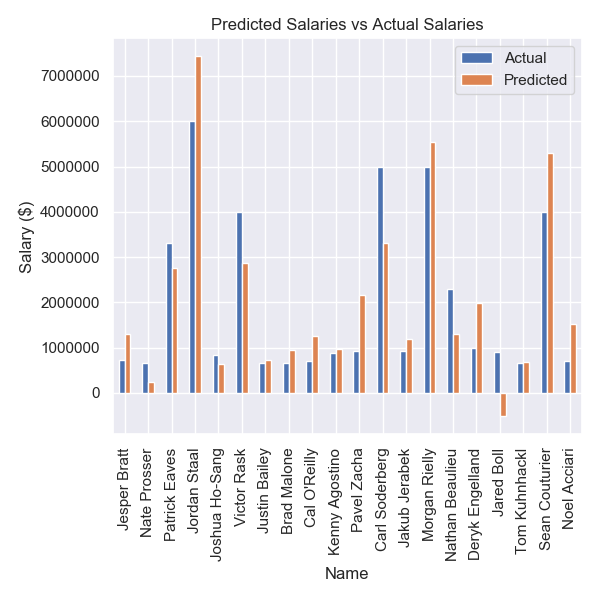

In [52]:
#Visualize our results, comparing the first 20 in the test set using a bar plot
results.head(20).plot(kind='bar',figsize=(6,6),x='Name')
plt.xticks(rotation=90)
plt.title('Predicted Salaries vs Actual Salaries')
plt.ylabel('Salary ($)')
plt.tight_layout()
plt.show()

In [50]:
sum(results.Predicted <=0)

2

### The addition of the dummy columns from the text data has increased the R^2 performance of our model, however we are still suffering with a few negative salary predictions. We have improved our test accuracy to a score of 0.75, with a training accuracy of 0.78. It also appears the model is taking advantage of the newly added team and position data. The number one feature found from the numeric data is Point Sharing, a catch all stat that follows how well a player contributes to points standings in the league. The second best feature is team expected goals while the player is on the ice. These seem reasonable as top stats.

### We are pleased with the success of creating model that predicts salary based on player statistics using linear regression. Any suggestions are welcome, and can be sent to willdupree90@gmail.com.